<a href="https://colab.research.google.com/github/noircir/TimeSeries-Colab/blob/master/manip_pandas_builtin_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time Series Analysis/pandas_visualization/df1.csv', index_col=0)
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time Series Analysis/pandas_visualization/df2.csv')

## Plot Types
There are several plot types built into pandas; most of them are statistical by nature:

- df.plot.hist()     histogram
- df.plot.bar()      bar chart
- df.plot.barh()     horizontal bar chart
- df.plot.line()     line chart
- df.plot.area()     area chart
- df.plot.scatter()  scatter plot
- df.plot.box()      box plot
- df.plot.kde()      kde plot
- df.plot.hexbin()   hexagonal bin plot
- df.plot.pie()      pie chart

You can also call specific plots by passing their name as an argument, as with df.plot(kind='area').

https://matplotlib.org/faq/usage_faq.html

In [6]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [7]:
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. [reference]

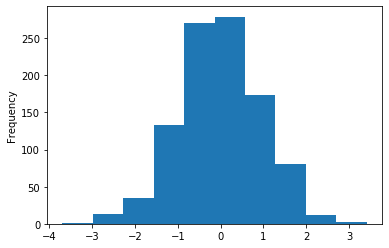

In [9]:
df1['A'].plot.hist();

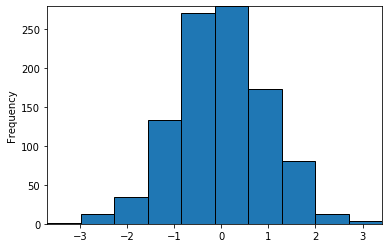

In [13]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

You can use any matplotlib color spec for edgecolor, such as 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', or the string representation of a float value for shades of grey, such as '0.5'

For autoscale the axis can be set to 'x', 'y' or 'both'

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

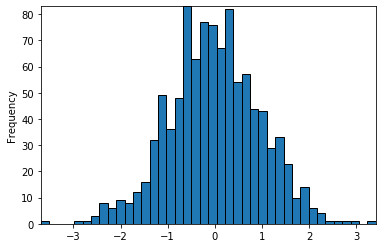

In [14]:
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

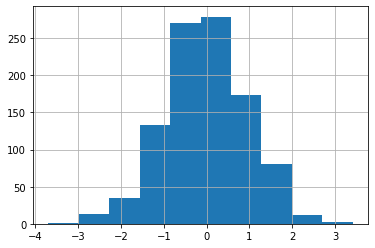

In [15]:
df1['A'].hist();

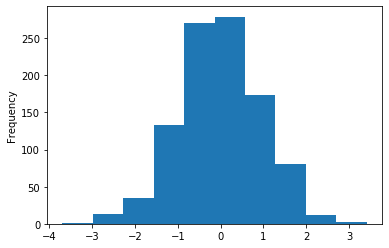

In [16]:
df1['A'].hist(grid=False).set_ylabel("Frequency");

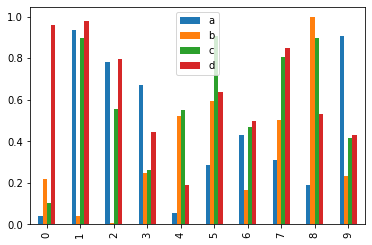

In [17]:
df2.plot.bar();

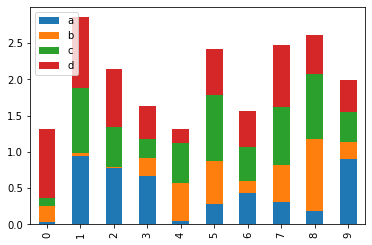

In [18]:
df2.plot.bar(stacked=True);

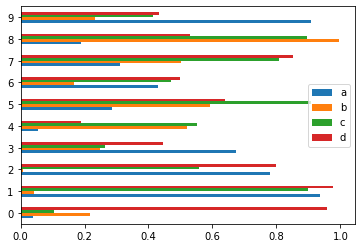

In [19]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index. [reference]

Line plots happen to be the default pandas plot. They are accessible through df.plot() as well as df.plot.line()

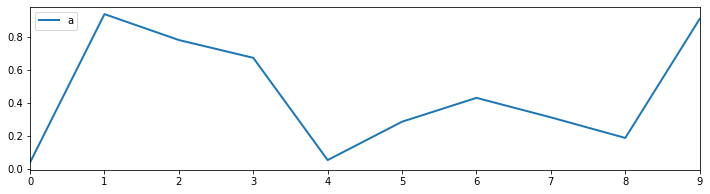

In [20]:
df2.plot.line(y='a',figsize=(12,3),lw=2);

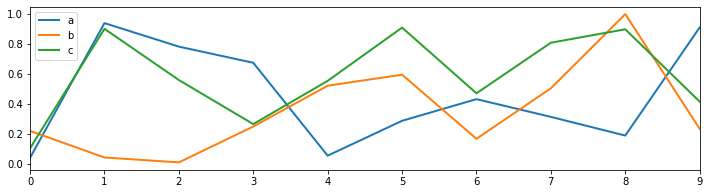

In [21]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. [reference]

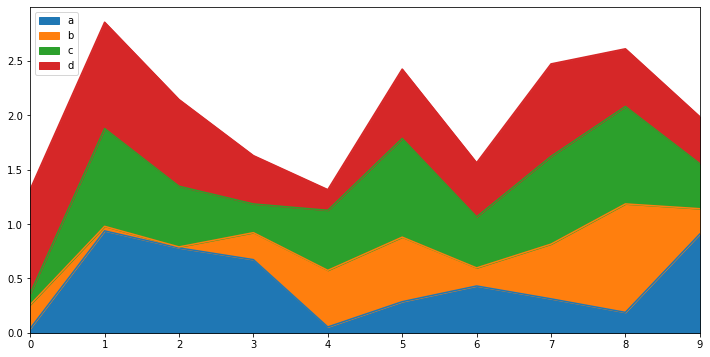

In [23]:
df2.plot.area(figsize=(12,6));

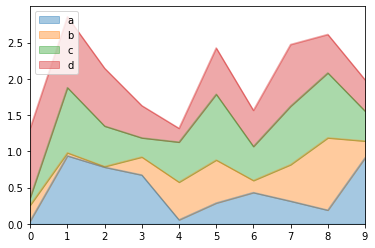

In [24]:
df2.plot.area(alpha=0.4);

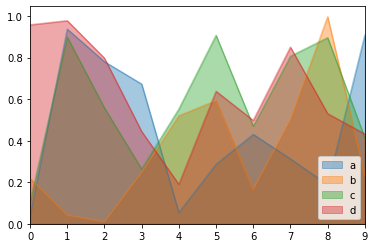

In [25]:
df2.plot.area(stacked=False, alpha=0.4);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. 

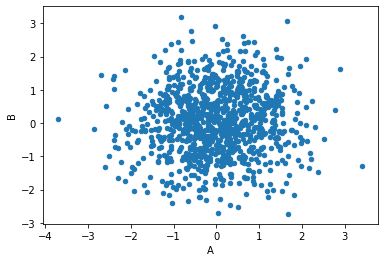

In [26]:
df1.plot.scatter(x='A',y='B');

## Scatter plots with colormaps
You can use c to color each marker based off another column value. Use cmap to indicate which colormap to use.
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

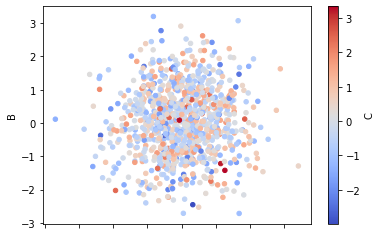

In [27]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

A fix for chopped-off x-axis tick

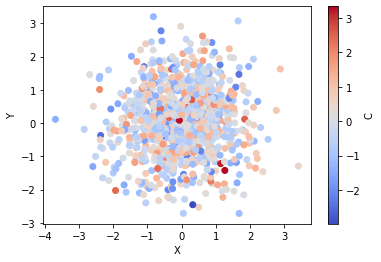

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df1['A'],df1['B'],c=df1['C'],cmap='coolwarm')
plt.colorbar().set_label('C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Scatter plots with sized markers¶
Alternatively you can use s to indicate marker size based off another column. The s parameter needs to be an array, not just the name of a column:

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


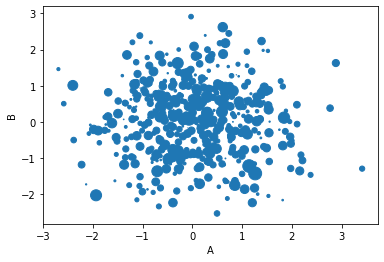

In [29]:
df1.plot.scatter(x='A',y='B',s=df1['C']*50);

The warning above appeared because some df1['C'] values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with .apply(func).

Also, these data points have a lot of overlap. We can address this issue by passing in an alpha blending value between 0 and 1 to make markers more transparent.

In [30]:
df1['C'].min()

-2.987971138961773

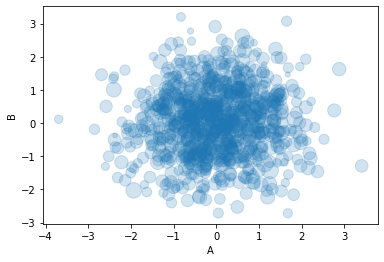

In [31]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

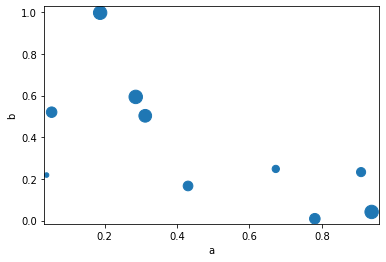

In [32]:
df2.plot.scatter(x='a',y='b',s=df2['c']*200).autoscale(enable=True, axis='both', tight=True);

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into quartiles about the mean.
Look here for a description of boxplots.

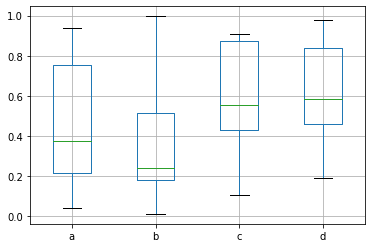

In [33]:
df2.boxplot();

## Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass by='columname' into .boxplot(). Here we'll group records by the 'e' column, and draw boxplots for the 'b' column.

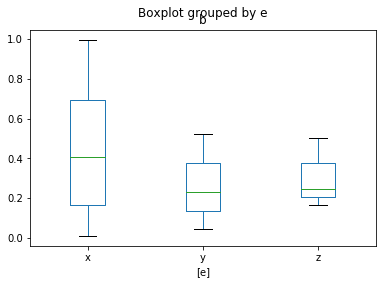

In [34]:
df2[['b','e']].boxplot(by='e', grid=False);

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through df.plot.kde() or df.plot.density()

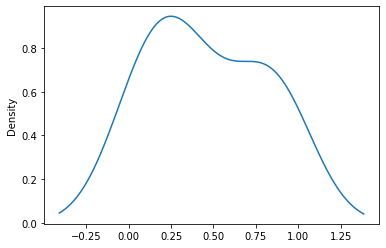

In [35]:
df2['a'].plot.kde();

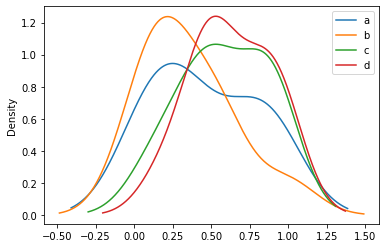

In [36]:
df2.plot.density();

## Hexagonal Bin Plot
Useful for Bivariate Data, alternative to scatterplot. 

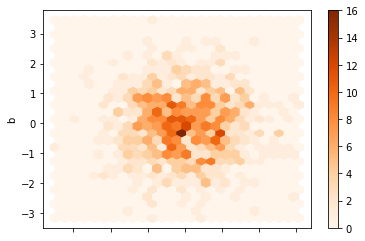

In [37]:
# FIRST CREATE A DATAFRAME OF RANDOM VALUES
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# MAKE A HEXAGONAL BIN PLOT
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges');